<div style="background-color: #30475e; padding: 20px; color: white; border-radius: 15px;">
    <h1 style="color: #f8a07e;"><center>Regionale Küche durch Zutaten erkennen</center></h1>
    <hr style="border-color: #f8a07e;">
    <div style="font-size:20px; text-align: center;">
        <b style="color: #ece8d9;">Verfasser:</b> Daniel Lange<br>
        <b style="color: #ece8d9;">Fach:</b> Machine Learning SoSe2023<br>
        <b style="color: #ece8d9;">Hochschule:</b> Fachhochschule Südwestfalen<br>
        <b style="color: #ece8d9;">Datum:</b> 06.08.2023<br>
    </div>
</div>


<img src="lily-banse--YHSwy6uqvk-unsplash_image.jpg"/>

<div style="background-color: #30475e; padding: 20px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>Inhaltsverzeichnis</center></h2>
    <hr style="border-color: #f8a07e;">
    <div style="font-size:20px; text-align: left;">
        <a href="#section1" style="color: #ece8d9;">1. Einführung</a><br>
        <a href="#section2" style="color: #ece8d9;">2. Datensatz</a><br>
        <a href="#section3" style="color: #ece8d9;">3. Explorative Datenanalyse</a><br>
        <a href="#section4" style="color: #ece8d9;">4. Iterative Modellentwicklung</a><br>
        <a href="#section5" style="color: #ece8d9;">5. Diskussion und Interpretation der Ergebnisse</a><br>
        <a href="#section6" style="color: #ece8d9;">6. Schlussfolgerung und zukünftige Arbeit</a><br>
        <a href="#section7" style="color: #ece8d9;">7. Referenzen</a><br>
    </div>
</div>


<a id="section1"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>1. Einführung</center></h2>
</div>

<a id="section2"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>2. Datensatz</center></h2>
</div>

Der Datensatz der in dieser Arbeit untersucht wird stammt aus dem "What's Cooking" Wettbewerb von der kompetetiven Data Science Plattform Kaggle. Bereitgestellt wurde er durch "Yummly.com". Die Plattform hat sich selber die Aufgabe gesetzt mit Big Data die intelligenteste und hilfreichste Plattform für Essen zu werden <a href="#section7" style="color: #f8a07e;">[1]</a>.

Es wurden auf Kaggle zwei Dateien bereitgestellt: "train.json" und "test.json". Letztere enthält keine Zielspalte und ist nur für die Bewertung auf Kaggle interessant.

Zu jedem Datenpunkt in der "train.json" gibt es drei Schlüssel:
- 'id': Eine eindeutige Identifikationsnummer für das jeweilige Rezept
- 'cuisine': Die Küche bzw. die Region welche die Herkunft des Rezepts angibt
- 'ingredients': Die Liste der Zutaten, welche für das Rezept benötigt werden

Insgesamt enthält der Datensatz 39.774 Einträge.

<a id="section3"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>3. Explorative Datenanalyse</center></h2>
</div>

In diesem Abschnitt wird die Explorative Datenanalyse durchgeführt. Das Ziel davon ist es die Daten zu visualisieren und zusammenzufassen um eine Intuition für das Projekt aufzubauen <a href="#section7" style="color: #f8a07e;">[2]</a>. Es ist der erste Schritt in jedem Projekt, welches mit Daten zutun hat <a href="#section7" style="color: #f8a07e;">[2]</a>.

Zunächst werden alle benötigten Imports ausgeführt.

In [48]:
import pandas as pd
import json
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
import squarify
import numpy as np
import seaborn as sns
import random
from matplotlib import font_manager
import dask.dataframe as dd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import optuna
import re

"Chained Assignment" Warnungen werden als nächstes ausgestellt:

In [10]:
pd.options.mode.chained_assignment = None

In diesem Schritt wird die JSON Datei mit dem Datensatz eingelesen:

In [11]:
with open('train.json') as raw_train:
    train_json = json.load(raw_train)

Die "json_normalize" Methode von Pandas kann verwendet werden um eine semi-strukturierte JSON Datei in ein flaches Dataframe zu konvertieren.

In [12]:
train = pd.json_normalize(train_json)

## Explorative Datenanalyse

Nach dem einlesen können die ersten 5 Zeilen des Dataframes ausgeben werden, um die Struktur des Datensatzes besser zu verstehen.

In [5]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


Wie bereits beschrieben besteht der Datensatz aus den drei Spalten: 'id', 'cuisine' und 'ingredients'.
Hierbei ist zu beachten das in 'ingredients' immer ein Listenobjekt mit den Zutaten ist.

Im nächsten Schritt wird ermittelt wie oft jede unterschiedliche Küche im Datensatz vorkommt.

In [6]:
print(train['cuisine'].value_counts())

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64


Die italienische Küche ist mit 7838 Rezepten am stärksten vertreten. Danach folgt die mexikanische Küche mit 6438 Rezepten und Südamerikanische Küche mit 4320 Rezepten.

Mit der 'df.explode' Methode kann die Liste an Zutaten zerlegt und auf einzelne Zeilen aufgeteilt werden.

In [7]:
train_exploded = train.explode('ingredients')

In [8]:
train_exploded.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce
0,10259,greek,black olives
0,10259,greek,grape tomatoes
0,10259,greek,garlic
0,10259,greek,pepper


In [9]:
train_exploded.shape

(428275, 3)

Um zu zählen wie oft welche Zutat insgesamt vorkommt kann "Chain" von "itertools" verwendet werden:

In [10]:
ingredient_list = list(chain.from_iterable(train['ingredients']))
counter = Counter(ingredient_list)
counts_df = pd.DataFrame.from_records(list(counter.items()), columns=['Ingredient', 'Count'])

In [11]:
counts_df.sort_values(by='Count', ascending=False, inplace=True)

In [12]:
counts_df

,Ingredient,Count
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380
...,...,...
5035,sauerkraut juice,1
5034,no-calorie sweetener,1
5033,Bob Evans Italian Sausage,1
5022,extra firm silken tofu,1


Um festzustellen wie viele Zutaten mehr als ein mal im Datensatz vorkommen kann gefiltert werden.

In [13]:
counts_df[counts_df['Count'] > 1]

,Ingredient,Count
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380
...,...,...
1888,pandan extract,2
4492,Greek dressing,2
4215,chocolate chunks,2
4217,regular sour cream,2


Als nächstes erfolgt die Extraktion und Verarbeitung der 30 am häufigsten verwendeten Zutaten. Im ersten Schritt wird eine Subselektion der Zutaten durchgeführt, die in der höchsten Anzahl von Rezepten auftreten.  
Im nächsten Schritt wird die Proportionalität jeder dieser Zutaten berechnet, indem die Häufigkeit der jeweiligen Zutat durch die Gesamtzahl der Zutaten geteilt wird (`top_ingredients['Count'] / total * 100`). Dies resultiert in einem prozentualen Wert, der die Verwendungshäufigkeit jeder Zutat in Relation zur Gesamtzahl der Rezepte repräsentiert.

In [14]:
top_ingredients = counts_df.head(30)

# Berechnen Sie die Prozentsätze
total = top_ingredients['Count'].sum()
top_ingredients['Percentage'] = top_ingredients['Count'] / total * 100
top_ingredients['Label'] = top_ingredients.apply(lambda row: '{}\n({:.1f}%)'.format(row['Ingredient'], row['Percentage']), axis=1)

Um den Plot anschaulicher zu gestalten werden einige Parameter für den Stil und die Schriftart gesetzt.

In [15]:
sns.set_style("darkgrid")

In [16]:
font_manager.fontManager.addfont('Merriweather-Regular.ttf')
prop = font_manager.FontProperties(fname='Merriweather-Regular.ttf')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [17]:
random.seed(60)
colors = sns.hls_palette(30)
random.shuffle(colors)

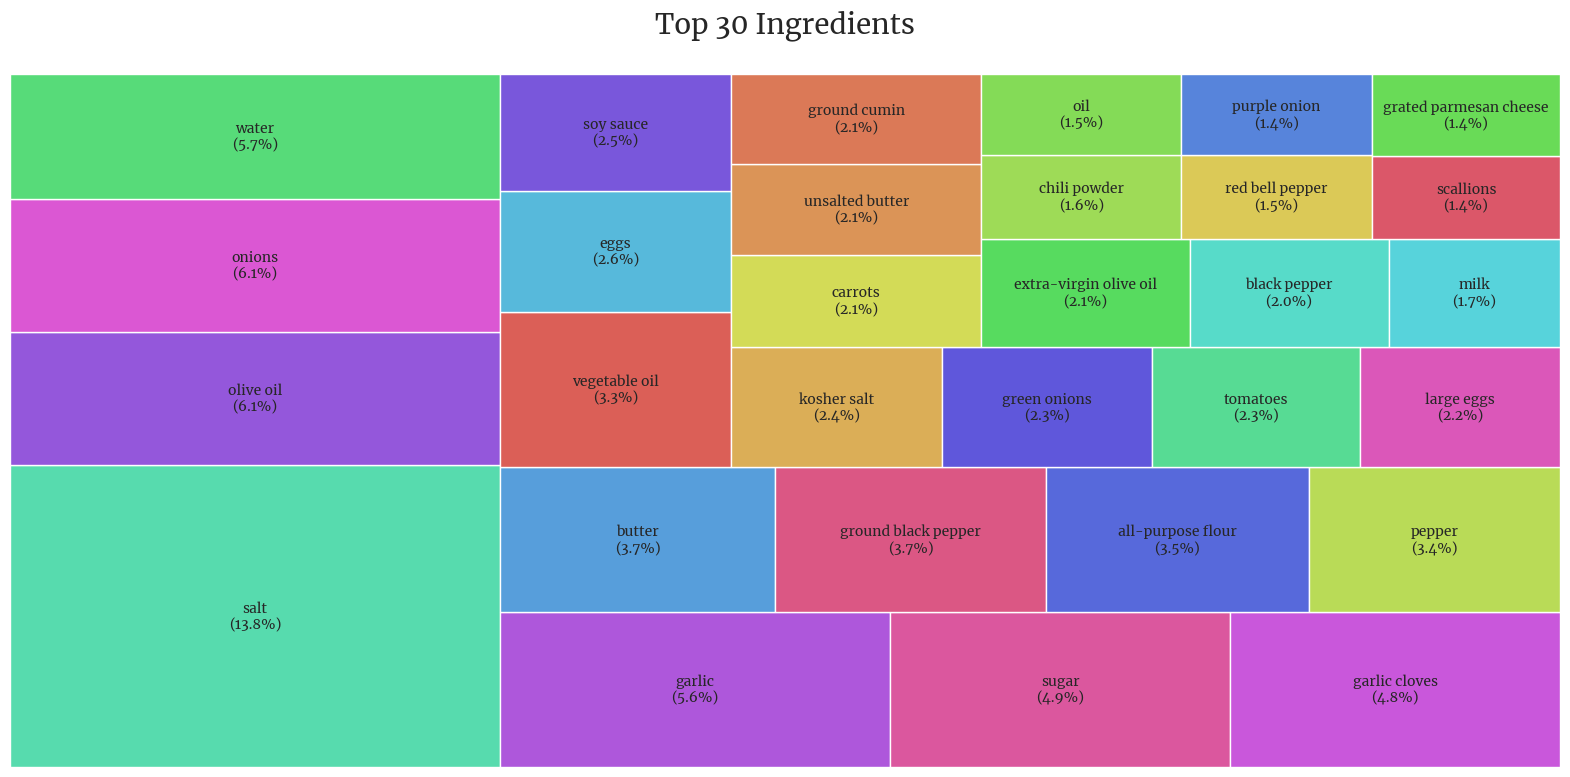

In [18]:
fig = plt.figure(figsize=(20, 9))
squarify.plot(sizes=top_ingredients['Percentage'], label=top_ingredients['Label'], color=colors)
plt.title("Top 30 Ingredients", fontsize=20, pad=30)
plt.axis('off')
plt.show()

Die Tree Map zeigt die 30 meistbenutzten Zutaten. Es ist immer angegeben, in wie viel Prozent der Rezepte, die Zutat vorkommt. Salz kommt in 13,8 % aller Rezepte vor. Olivenöl ist in 6,1 %, Zwiebeln ebenfalls in 6,1 % und Wasser in 5,7 % aller Rezepte enthalten. Man kann aus dieser Darstellung auch erkennen, dass es sowohl Rezepte gibt, in der die genaue Art von Zwiebeln angegeben wird (rote oder weiße Zwiebeln), als auch Rezepte, in denen nur angegeben wird, dass Zwiebeln benötigt werden. Folglich werden Zwiebeln und rote/weiße Zwiebeln derzeit als unterschiedliche Zutaten angesehen.

In [19]:
cuisine_counts = train['cuisine'].value_counts()
df_cuisine_counts = pd.DataFrame(cuisine_counts).reset_index()
df_cuisine_counts.columns = ['category', 'count']

Text(0.5, 1.0, 'Distribution of Recipes Across Countries')

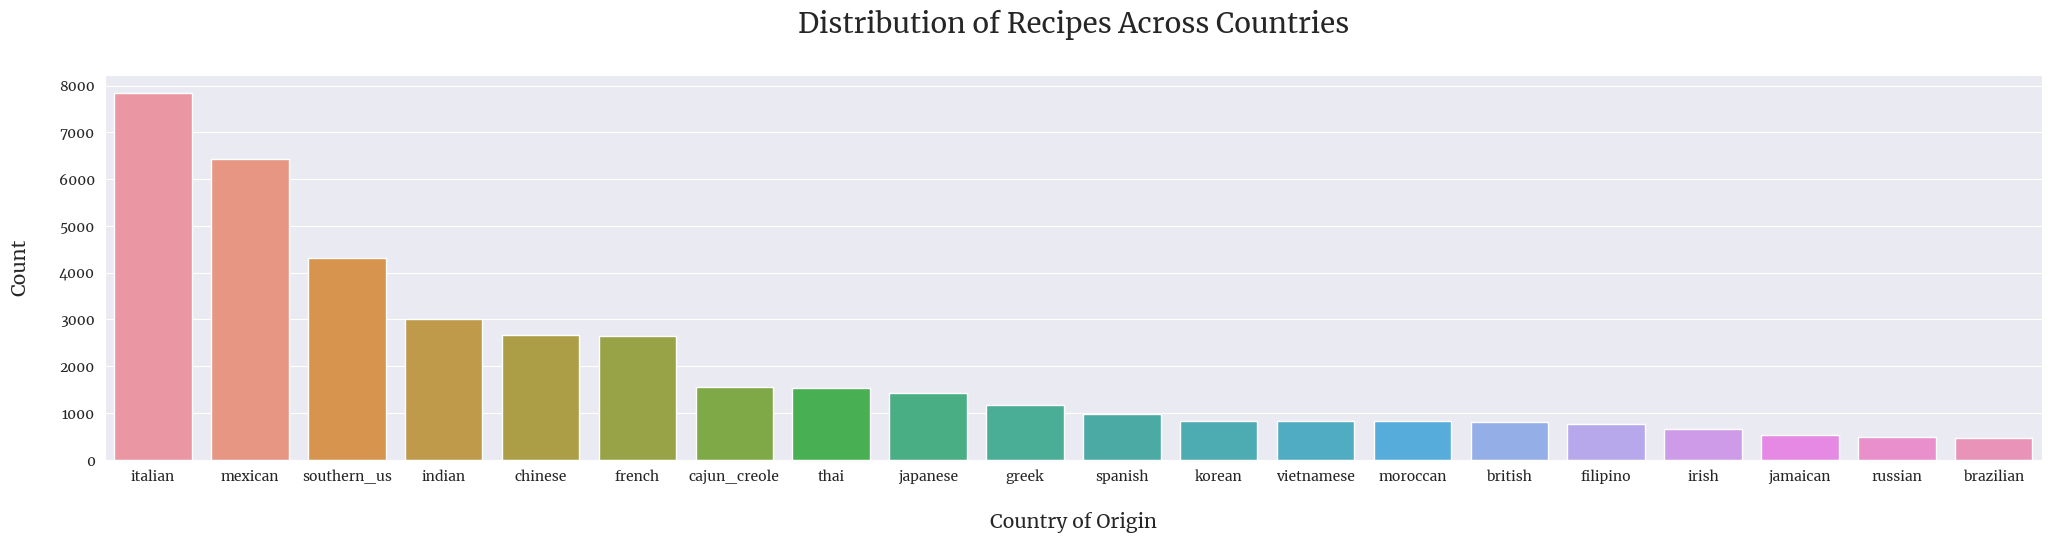

In [20]:
plt.figure(figsize=(25, 5))
sns.barplot(x='category', y='count', data=df_cuisine_counts)
plt.xlabel('Country of Origin', fontsize=14, labelpad=20)
plt.ylabel('Count', fontsize=14, labelpad=20)
plt.title('Distribution of Recipes Across Countries', fontsize=20, pad=30)

Das Balkendiagramm zeigt die Verteilung der Rezepte auf die einzelnen Länder. Die meisten Rezepte kommen aus Italien, gefolgt von Mexiko und Südamerika. Der kleinste Anteil an Rezepten kommt aus Brasilien.

In [21]:
num_ingredients_per_recipe = train['ingredients'].apply(len)

Text(0, 0.5, 'Count')

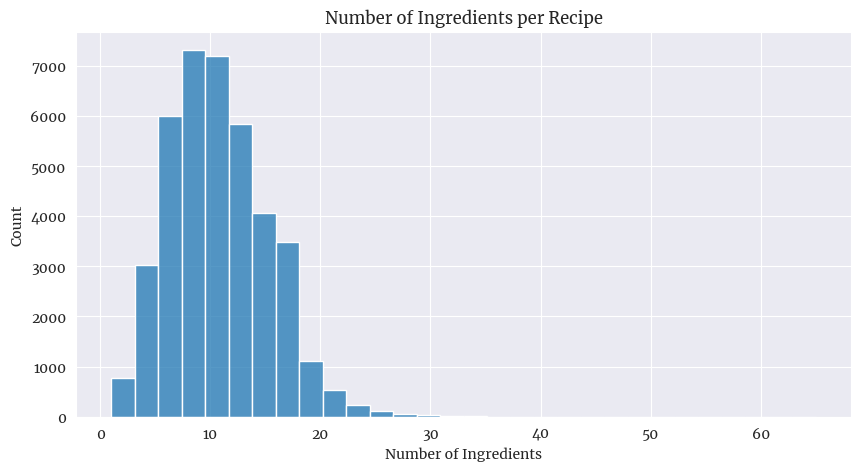

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(x=num_ingredients_per_recipe, kde=False, bins=30)
plt.title('Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')

Das Histogramm zeigt die Verteilung der Anzahl an Zutaten, welche in den Rezepten stehen. Man kann erkennen, dass die meisten Rezepte ungefähr 10 Zutaten beinhalten. Nur wenige Rezepte haben mehr als 20 Zutaten.

<a id="section4"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>4. Iterative Modellentwicklung</center></h2>
</div>

## Daten Vorverarbeitung

In [22]:
class ParallelOneHotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Explode the ingredients
        X_exploded = X.explode('ingredients')
        
        # Perform one-hot encoding
        one_hot = pd.get_dummies(X_exploded['ingredients'])
        X_one_hot = pd.concat([X_exploded[['id']], one_hot], axis=1)
        
        # Convert to Dask DataFrame for efficient computation
        X_one_hot_ddf = dd.from_pandas(X_one_hot, npartitions=10)
        
        # Group by id and cuisine, and sum
        X_final = X_one_hot_ddf.groupby(['id']).sum().compute()
        
        return X_final

In [23]:
parallel_one_hot = ParallelOneHotTransformer()

In [24]:
X = parallel_one_hot.transform(train.drop('cuisine', axis=1))  # Dies sind die Merkmale (Zutaten)
y = train[['id','cuisine']]  # Dies ist das Ziel (Küchenart)

In [25]:
y = train[['id','cuisine']] 

In [26]:
y.set_index('id', inplace=True)

In [27]:
y = y.reindex(X.index)

In [28]:
y

,cuisine
id,
8,french
30,jamaican
31,mexican
41,mexican
43,french
...,...
49652,vietnamese
49670,mexican
49691,thai


In [29]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
# Check the shapes of the resulting sets
print("Train set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

## Berechnung der Modell Genauigkeit

In [13]:
def calc_acc(model, X_train, y_train, X_val, y_val, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Validation Accuracy:', accuracy_score(y_val, y_pred_val))
    print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

## Logistische Regression

In [67]:
# Erstellen Sie das Modell
model = LogisticRegression(max_iter=1000)  # Sie müssen möglicherweise die Anzahl der Iterationen erhöhen, wenn das Modell nicht konvergiert

# Trainieren Sie das Modell
model.fit(X_train, np.ravel(y_train))

LogisticRegression(max_iter=1000)

In [72]:
calc_acc(model)

Train Accuracy: 0.8985309435724291
Validation Accuracy: 0.7696949379818974
Validation Accuracy: 0.7699011228422993


## Random Forest Classifier

In [74]:
rfc = RandomForestClassifier(random_state=42, verbose=1, n_jobs=-1)
rfc.fit(X_train, np.ravel(y_train))

RandomForestClassifier(random_state=42)

In [75]:
calc_acc(rfc)

Train Accuracy: 0.99974857224956
Validation Accuracy: 0.7111967817633255
Validation Accuracy: 0.7058823529411765


## Feature Auswahl mit Varianz Schwellenwert

In [112]:
pipe = Pipeline([
    ('selector', VarianceThreshold(threshold=(.9996 * (1 - .9996)))),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [113]:
pipe.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.000399839999999956)),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [114]:
var_thresh = pipe.named_steps['selector']
X_train_new = pd.DataFrame(var_thresh.transform(X_train), index=X_train.index, columns=X_train.columns[var_thresh.get_support()])
X_train_new.shape

(27841, 1838)

In [115]:
X_train_new

,1% low-fat milk,2% reduced-fat milk,Alfredo sauce,American cheese,Anaheim chile,Belgian endive,Boston lettuce,Burgundy wine,California bay leaves,Chinese egg noodles,...,yellow mustard,yellow mustard seeds,yellow onion,yellow peppers,yellow split peas,yellow squash,yoghurt,yukon gold potatoes,ziti,zucchini
id,,,,,,,,,,,,,,,,,,,,,
2259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
calc_acc(pipe, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.9989583707481772
Validation Accuracy: 0.7029835735836406
Test Accuracy: 0.7035361153008212


## Feature Auswahl mit Chi-Quadrat-Test

In [ ]:
# Define the pipeline
pipe = Pipeline([
    ('selector', SelectKBest(chi2, k=20)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Now you can evaluate the model as usual
calc_acc(pipe, X_train, y_train, X_val, y_val, X_test, y_test)

## Count Vectorizer

In [14]:
train_reindex = train.set_index('id')

In [15]:
train_reindex.head()

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [16]:
train_toString = train_reindex.copy()
train_toString['ingredients'] = train_reindex['ingredients'].apply(', '.join)

In [17]:
train_toString.head()

,cuisine,ingredients
id,,
10259,greek,"romaine lettuce, black olives, grape tomatoes,..."
25693,southern_us,"plain flour, ground pepper, salt, tomatoes, gr..."
20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
22213,indian,"water, vegetable oil, wheat, salt"
13162,indian,"black pepper, shallots, cornflour, cayenne pep..."


In [18]:
def alpha_tokenizer(text):
    # This regular expression pattern matches any word that consists of alphabetic characters
    pattern = re.compile(r'\b[^\d\W]+\b')
    return pattern.findall(text.lower())

In [19]:
cv = CountVectorizer(tokenizer=alpha_tokenizer)
train_vectorized = cv.fit_transform(train_toString['ingredients'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
matrix_df = pd.DataFrame(train_vectorized.toarray(), columns=cv.get_feature_names_out())

# Now print the DataFrame
matrix_df.head()

,a,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,...,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_val_test, y_train, y_val_test = train_test_split(matrix_df, train_toString['cuisine'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [22]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((27841, 3008), (5967, 3008), (5966, 3008), (27841,), (5967,), (5966,))

In [23]:
vlr = LogisticRegression(max_iter=1000, n_jobs=-1)
vlr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [35]:
calc_acc(vlr, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.8673898207679321
Validation Accuracy: 0.7931612470667113
Test Accuracy: 0.7697335344394168


In [36]:
vrfc = RandomForestClassifier(random_state=42, verbose=1, n_jobs=-1)
vrfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 100 | elapsed:    2.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [37]:
calc_acc(vrfc, X_train, y_train, X_val, y_val, X_test, y_test)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.1s remaining:    3.7s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    1.6s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    2.0s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.1s finished


Train Accuracy: 0.9995689809992457
Validation Accuracy: 0.7549446865571572
Test Accuracy: 0.7479470420646891


In [39]:
# Initialize a SVC
vsvc = SVC(kernel='linear', C=1.0, random_state=42)
# Fit the classifier to the training data
vsvc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [40]:
calc_acc(vsvc, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.9165619051039834
Validation Accuracy: 0.771371102916527
Test Accuracy: 0.7536450477626948


## Tfidf Vectorizer

In [24]:
# Initialize a TfidfVectorizer
tv = TfidfVectorizer(tokenizer=alpha_tokenizer)
train_tvectorized = tv.fit_transform(train_toString['ingredients'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
tmatrix_df = pd.DataFrame(train_tvectorized.toarray(), columns=tv.get_feature_names_out())
tmatrix_df.head()

,a,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,...,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train, X_val_test, y_train, y_val_test = train_test_split(tmatrix_df, train_toString['cuisine'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [27]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((27841, 3008), (5967, 3008), (5966, 3008), (27841,), (5967,), (5966,))

In [51]:
tvlr = LogisticRegression(max_iter=1000, n_jobs=-1)
tvlr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [52]:
calc_acc(tvlr, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.8192234474336411
Validation Accuracy: 0.7869594368085819
Test Accuracy: 0.7715770068711245


In [53]:
tvrfc = RandomForestClassifier(random_state=42, verbose=1, n_jobs=-1)
tvrfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 100 | elapsed:    2.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [54]:
calc_acc(tvrfc, X_train, y_train, X_val, y_val, X_test, y_test)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.1s remaining:    3.7s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.2s remaining:   11.0s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    1.4s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.1s finished


Train Accuracy: 0.9995689809992457
Validation Accuracy: 0.7490781092859538
Test Accuracy: 0.7390648567119156


In [58]:
tvlsvc = LinearSVC(C=1.0, max_iter=1000, random_state=42)
tvlsvc.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=42)

In [59]:
calc_acc(tvlsvc, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.8651269710139722
Validation Accuracy: 0.7939993295340262
Test Accuracy: 0.7767722473604827


## Hyperparameter Tuning mit Optuna

In [78]:
params = tvlsvc.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': 'warn', 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


In [85]:
def objective(trial):
    c = trial.suggest_float('svc_c', 1e-3, 1e3)
    tol = trial.suggest_float('svc_tol', 1e-5, 1e-1)
    max_iter = trial.suggest_int('svc_max_iter', 500, 5000)
    class_weight = trial.suggest_categorical('svc_class_weight', [None, 'balanced'])
    penalty = trial.suggest_categorical('svc_penalty', ['l1', 'l2'])
    model = LinearSVC(C=c, tol=tol, class_weight=class_weight, penalty=penalty, random_state=42, dual=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

In [86]:
study = optuna.create_study(study_name="LSVC", load_if_exists=True, direction='maximize')

[I 2023-07-21 19:42:16,270] A new study created in memory with name: LSVC


In [87]:
study.optimize(objective, n_trials=1000, n_jobs=-1)

[I 2023-07-21 19:42:26,791] Trial 4 finished with value: 0.7742205833053972 and parameters: {'svc_c': 628.8820980779496, 'svc_tol': 0.023024379628168196, 'svc_max_iter': 1317, 'svc_class_weight': None, 'svc_penalty': 'l2'}. Best is trial 4 with value: 0.7742205833053972.
[I 2023-07-21 19:42:26,808] Trial 1 finished with value: 0.7896413007039893 and parameters: {'svc_c': 899.820778955019, 'svc_tol': 0.09074640968050415, 'svc_max_iter': 3823, 'svc_class_weight': None, 'svc_penalty': 'l2'}. Best is trial 1 with value: 0.7896413007039893.
[I 2023-07-21 19:42:26,886] Trial 2 finished with value: 0.7524304391552129 and parameters: {'svc_c': 855.0745921375908, 'svc_tol': 0.06484338715646308, 'svc_max_iter': 1854, 'svc_class_weight': 'balanced', 'svc_penalty': 'l2'}. Best is trial 1 with value: 0.7896413007039893.
[I 2023-07-21 19:42:27,412] Trial 9 finished with value: 0.7904793831713041 and parameters: {'svc_c': 603.9140766515234, 'svc_tol': 0.09284397552643865, 'svc_max_iter': 639, 'svc_cl

In [89]:
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

Best trial: {'svc_c': 1.970617278279593, 'svc_tol': 0.08535792011125493, 'svc_max_iter': 4692, 'svc_class_weight': None, 'svc_penalty': 'l2'}
Best value: 0.7968488099228964


In [91]:
tuned_tvlsvc = LinearSVC(C=1.970617278279593, tol=0.08535792011125493, max_iter=4692, class_weight=None, penalty='l2', random_state=42, dual=False)
tuned_tvlsvc.fit(X_train, y_train)

LinearSVC(C=1.970617278279593, dual=False, max_iter=4692, random_state=42,
          tol=0.08535792011125493)

In [93]:
calc_acc(tuned_tvlsvc, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.8498257964871951
Validation Accuracy: 0.7968488099228964
Test Accuracy: 0.7761018937489526


In [16]:
def objective(trial):
    c = trial.suggest_float('lr_c', 1e-10, 1e10)
    tol = trial.suggest_float('lr_tol', 1e-6, 1e-1)
    solver = trial.suggest_categorical('lr_solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    penalty = trial.suggest_categorical('lr_penalty', [None, 'l1', 'l2', 'elasticnet'])
    
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('lr_l1_ratio', 0, 1)
    else:
        l1_ratio = None

    if solver == 'liblinear':
        if penalty == 'elasticnet' or penalty is None:
            raise optuna.TrialPruned()
    elif solver == 'newton-cg' or solver == 'lbfgs' or solver == 'sag':
        if penalty == 'elasticnet' or penalty == 'l1':
            raise optuna.TrialPruned()

    model = LogisticRegression(C=c, tol=tol, solver=solver, penalty=penalty, l1_ratio=l1_ratio, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

In [17]:
study2 = optuna.create_study(study_name="LR", load_if_exists=True, direction='maximize')

[I 2023-07-21 20:42:38,473] A new study created in memory with name: LR


In [18]:
study2.optimize(objective, n_trials=100, n_jobs=-1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2023-07-21 20:42:39,796] Trial 3 pruned. 
[I 2023-07-21 20:42:39,800] Trial 4 pruned. 
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2023-07-21 20:42:39,819] Trial 5 pruned. 
[I 2023-07-21 20:42:40,170] Trial 8 pruned. 
[I 2023-07-21 20:42:40,479] Trial 9 pruned. 
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[I 2023-07-21 20:42:42,197] Trial 49 pruned. 
[I 2023-07-21 20:42:42,719] Trial 17 pruned. 
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnin

KeyboardInterrupt: 

In [19]:
print('Best trial:', study2.best_trial.params)
print('Best value:', study2.best_value)

Best trial: {'lr_c': 5551428012.517555, 'lr_tol': 0.08885829107871503, 'lr_solver': 'saga', 'lr_penalty': 'l2'}
Best value: 0.7894736842105263


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-07-21 20:57:07,685] Trial 94 finished with value: 0.7383506537043245 and parameters: {'lr_c': 169734579.67837048, 'lr_tol': 0.0010748008145344146, 'lr_solver': 'sag', 'lr_penalty': 'l2'}. Best is trial 60 with value: 0.7894736842105263.


In [31]:
tuned_tvlr = LogisticRegression(max_iter=1000, C=5551428012.51755, tol=0.08885829107871503, solver='saga', penalty='l2', n_jobs=-1, random_state=42)
tuned_tvlr.fit(X_train, y_train)

LogisticRegression(C=5551428012.51755, max_iter=1000, n_jobs=-1,
                   random_state=42, solver='saga', tol=0.08885829107871503)

In [32]:
calc_acc(tuned_tvlr, X_train, y_train, X_val, y_val, X_test, y_test)

Train Accuracy: 0.8717359290255379
Validation Accuracy: 0.7894736842105263
Test Accuracy: 0.771409418468242


## Ensemble Modell

In [53]:
model1 = LogisticRegression(max_iter=1000, C=5551428012.51755, tol=0.08885829107871503, solver='saga', penalty='l2', n_jobs=-1, random_state=42)
model2 = make_pipeline(StandardScaler(), CalibratedClassifierCV(LinearSVC(C=1.970617278279593, tol=0.08535792011125493, max_iter=4692, class_weight=None, penalty='l2', random_state=42, dual=False)))
model3 = RandomForestClassifier(random_state=42, verbose=1, n_jobs=-1)

In [54]:
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('svc', model2), ('rf', model3)], voting='soft')

In [55]:
ensemble_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 100 | elapsed:    2.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5551428012.51755,
                                                 max_iter=1000, n_jobs=-1,
                                                 random_state=42, solver='saga',
                                                 tol=0.08885829107871503)),
                             ('svc',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('calibratedclassifiercv',
                                               CalibratedClassifierCV(estimator=LinearSVC(C=1.970617278279593,
                                                                                          dual=False,
                                                                                          max_iter=4692,
                                                                                          random_state=42,
                                                                                          tol=0.08535792011125493)))])),
                             ('rf',
                              RandomForestClassifier(n_jobs=-1, random_state=42,
                                                     verbose=1))],
                 voting='soft')

In [56]:
calc_acc(ensemble_model, X_train, y_train, X_val, y_val, X_test, y_test)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.1s remaining:    3.2s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    2.0s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.1s finished


Train Accuracy: 0.9516899536654574
Validation Accuracy: 0.8007039892725444
Test Accuracy: 0.7809619574325457


[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    2.0s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.1s finished


<a id="section5"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>5. Diskussion und Interpretation der Ergebnisse</center></h2>
</div>

In [72]:
table_data = {
    'Model': ['Logistische Regression (One Hot)', 'Random Forest (One Hot)', 'Random Forest (Varianzschwellenwert)',
              'Logistische Regression (Count Vectorizer)', 'Random Forest (Count Vectorizer)', 'SVC (Count Vectorizer)',
              'Logitische Regression (Tfidf)', 'Random Forest (Tfidf)', 'Linear SVC (Tfidf)',
              'Linear SVC (Tfidf & Tuned)', 'Logistische Regression (Tfidf & Tuned)', 'Ensemble (LR & LSVC & RF)'],
    'Validation Accuracy': [0.769,  0.711, 0.702, 0.793, 0.754, 0.771,  0.786, 0.749, 0.793, 0.796, 0.789, 0.800],
    'Test Accuracy': [0.769, 0.705, 0.703, 0.769, 0.747, 0.753, 0.771, 0.739, 0.776, 0.776, 0.771, 0.780]
}

table_df = pd.DataFrame(table_data)

In [70]:
def highlight_max(s):
    '''
    Markiere das Maximum in einer Serie gelb.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [77]:
df.style.format({'Validation Accuracy': "{:.3f}", 'Test Accuracy': "{:.3f}"}).apply(highlight_max, subset=['Test Accuracy', 'Validation Accuracy'])

,Model,Validation Accuracy,Test Accuracy
0,Logistische Regression (One Hot),0.769,0.769
1,Random Forest (One Hot),0.711,0.705
2,Random Forest (Varianzschwellenwert),0.702,0.703
3,Logistische Regression (Count Vectorizer),0.793,0.769
4,Random Forest (Count Vectorizer),0.754,0.747
5,SVC (Count Vectorizer),0.771,0.753
6,Logitische Regression (Tfidf),0.786,0.771
7,Random Forest (Tfidf),0.749,0.739
8,Linear SVC (Tfidf),0.793,0.776
9,Linear SVC (Tfidf & Tuned),0.796,0.776


<a id="section6"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>6. Schlussfolgerung und zukünftige Arbeit</center></h2>
</div>

<a id="section7"></a>
<div style="background-color: #30475e; padding: 20px; margin-top: 140px; color: white; border-radius: 15px;">
    <h2 style="color: #f8a07e;"><center>7. Referenzen</center></h2>
</div>

[1] Yummly, "About Yummly," Yummly. [Online]. Verfügbar: https://www.yummly.com/about. Zugriff am: 10-Juli-2023.  
[2] P. Bruce und A. Bruce, Practical Statistics for Data Scientists. Sebastopol, CA: O'Reilly Media, 2017, S. 46.